<a href="https://colab.research.google.com/github/BrilliantChard/CNN-Projects/blob/main/CNN_Cats_and_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/labels.csv', delimiter=',')

y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/labels_test.csv', delimiter=',')
x_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/input_test.csv', delimiter=',')

# Reshaping

In [ ]:
print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")

print(f"Y train shape: {y_train.shape}")
print(f"Y test shape: {y_test.shape}")

X train shape: (2000, 100, 100, 3)
X test shape: (400, 30000)
Y train shape: (2000,)
Y test shape: (400,)


In [ ]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
x_test = x_test.reshape(len(x_test), 100, 100, 3)

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)


In [ ]:
print(f'Shape of X train: {x_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print(f'Shape of x test: {x_test.shape}')
print(f'Shape of y test: {y_test.shape}')

Shape of X train: (2000, 100, 100, 3)
Shape of y train: (2000, 1)
Shape of x test: (400, 100, 100, 3)
Shape of y test: (400, 1)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train/255.0
y_test = y_test/255.0

In [ ]:
x_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

# Displaying a random Image

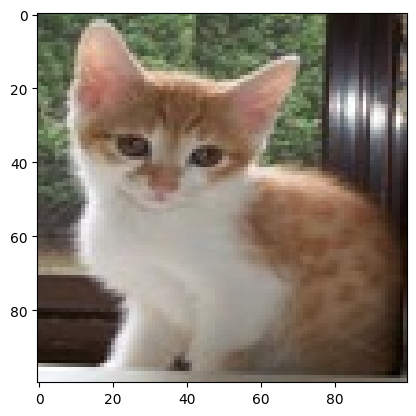

In [ ]:
image = random.randint(0, len(x_train))

plt.imshow(x_train[image, :])
plt.show()

# **Model Selection and Training**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilation

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3940 - loss: 0.1913
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4873 - loss: 0.0203
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5126 - loss: 0.0160
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5166 - loss: 0.0154
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5046 - loss: 0.0147
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4933 - loss: 0.0146
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5135 - loss: 0.0139
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5026 - loss: 0.0141
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5015 - loss: 0.0141
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5023 - loss: 0.0140


In [ ]:
predictions = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report